In [2]:
# instalación de la libría
# pip install  

In [3]:
# Python libraries to be used for the examples
import re
import os
import pandas as pd
import random

from codauto import Codifier
from codauto import Structured
from codauto import CodifierFastText
from codauto import StructuredCNAE
from codauto import preprocess_text
from codauto import fill_prompt_aug_data
from codauto import fill_prompt_synt_data

#### All the explanations in this tutorial are first in Spanish and then translated into English.

# Tutorial Codauto
- [Generación de prompts](#Generación-de-prompts)
- [Clases básicas de codauto](#Clases-básicas-de-codauto)
- [Uso de structured](#Uso-de-Structured)
- [Uso de Codifier](#Uso-de-Codifier)
    - [CodifierFastText](#CodifierFastText)

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Tutorial Codauto
- [Prompt generation](#Prompt-generation)
- [Basic Codauto Classes](#Basic-Codauto-Classes)
- [Using Structured](#Using-Structured)
- [Using Codifier](#Uso-de-Codifier)
    - [CodifierFastText](#CodifierFastText)



## Generación de prompts
Esta librería ofrece dos funciones para generar prompts orientados a la producción de datos sintéticos mediante modelos de lenguaje (LLMs), utilizando dos enfoques distintos basados en notas explicativas.

- *fill_prompt_synt_data()*: Rellena una plantilla de prompt reemplazando los marcadores predefinidos con un título y las notas proporcionadas. El objetivo de esta función es generar prompts que permitan a los modelos de lenguaje (LLMs) producir directamente muestras de descripciones codificadas.

- *fill_prompt_aug_data()*: Rellena una plantilla de prompt sintético sustituyendo los marcadores predefinidos por un título y unas notas proporcionadas. El objetivo de esta función es generar prompts que instruyan a los modelos de lenguaje (LLMs) para crear diccionarios de sinónimos a partir de las palabras clave del título, y posteriormente generar muestras de descripciones codificadas en las que dichas palabras sean reemplazadas por sus sinónimos.

--------------------------------------------------------------------------------------------------------------------------------------------------------
## Prompt generation
This library has two functions for generating prompts to produce synthetic data with LLMs via two different approaches using explanatory notes.

- *fill_prompt_synt_data()*: It fills a synthetic prompt template by replacing predefined placeholders with a given title and notes. The purpose of this function is to generate prompts for requesting that LLMs directly generate samples of coded descriptions.

- *fill_prompt_aug_data()*: It fills a synthetic prompt template by replacing predefined placeholders with a given title and notes. The purpose of this function is to generate prompts for requesting that LLMs create dictionaries of synonyms from the keywords in the title, and then generate samples of coded descriptions by replacing the words in the title.

In [4]:
# Example of how to use it
prompt_data = 'Generate analogous sentences from: <title> that fit in this context: <includes>.'
print(
    fill_prompt_synt_data(
        title='(the first class title)', 
        includes='(the first class include notes)', 
        prompt=prompt_data
    )
)

pormpt_data_aug = 'Please find synonyms for the words in <title> that fit in this context: <includes>.' 
print(
    fill_prompt_aug_data(
        title='(the first class title)', 
        includes= '(the first class include notes)', 
        language='english', 
        prompt=pormpt_data_aug
    )
)

Generate analogous sentences from: (the first class title) that fit in this context: (the first class include notes).
Please find synonyms for the words in {'first', 'class', 'title'} that fit in this context: (the first class include notes).


In [5]:
#Spanish example
print(fill_prompt_synt_data('Cultivo de arroz', 'Esta clase comprende el cultivo de cualquier tipo de arroz: basmati, bomba, integral...'))

print(fill_prompt_aug_data('Cultivo de arroz', 'Esta clase comprende el cultivo de cualquier tipo de arroz: basmati, bomba, integral...'))


Eres un experto en generación de datos de entrenamiento para modelos de clasificación.
Tu tarea es tomar una frase raíz de una actividad económica general y generar frases de entrenamiento a partir de ejemplos concretos incluidos en un texto.
Cuando corresponda, procura introducir la palabra 'otras' u 'otros' y también el uso o destino del producto.
Siempre que sea fabricación de un objeto, incluye el material con el que se hace.
Evita generar frases completamente distintas o que cambien el contexto y devuelve ÚNICAMENTE las frases sin presentaciones, comentarios, explicaciones ni frases adicionales.
Evita introducir tu output con frases como 'aquí te dejo las frases generadas' o similares.
Quiero utilizar directamente tu output así que SOLO quiero las frases.
Aquí tienes un ejemplo:
Raiz: Elaboración de productos de panadería y pastelería.
Texto: Esta clase incluye la fabricación de cualquier producto de panadería como: barras de pan, pasteles, otras harinas y pan para pienso.
Salida

## Clases básicas de codauto
La librería Codifier está diseñada para entrenar modelos de clasificación en procesamiento de lenguaje natural (NLP) orientados a estándares estadísticos. Esta se compone de dos clases principales que actúan como clases padre:

- **Structure**: Esta clase contiene los métodos básicos para analizar, estandarizar y describir una clasificación. Está estrucutrada de tal manera que se puede programar una clase hija para cualquier clasificación con solo generar su propio método *get_level()*.

- **Codifier**: Esta clase contiene los métodos básicos para entrenar, evaluar y predicir con modelos. Está estructurado de tal manera que se puede incluir cualquier clase de modelo programando una clase hija.

Se recomienda consultar la documentación con help antes de comenzar.

--------------------------------------------------------------------------------------------------------------------------------------------------------
## Basic Codauto Classes
The codifier library is designed to train NLP classification models for statistical standards. It consists of two main parent classes:

- **Structure**: This class contains the basic methods for analyzing, standardizing, and describing any hierarchical classification. It is structured in such a way that a child class can be programmed for any hierarchical classification with its own *get_level()* method

- **Codifier**: This class contains the basic methods for training, evaluating, and predicting with NLP models. It is structured in such a way that any model class can be included by programming a child class.

It is recommended to consult the documentation with the help function before starting.

In [6]:
#help(Codifier)

In [7]:
# help(Structured)

## Uso de Structured
Para cualquier clase estadística jerárquica se puede generar una clase hija de Structured que contenga el método *get_level()*. A continuación se pondrá un ejemplo con la [CNED_P](https://ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177034&menu=ultiDatos&idp=1254735976614). Esta clasificación consta de una estructura jerárica de 4 niveles. El primer nivel se representa con una letra, el segundo con un dígito, el tercero con dos letras y el cuarto con dos dígitos. El archivo de estructura que se va a usar en el tutorial se puede descargar [aquí](https://ine.es/daco/daco42/clasificaciones/cned14/CNED14_P_estr.xls)

El método *get_level()* debe recibir un código y devolver un int indicado el nivel: 0 para el nivel de más jerarquía, 1 para el siguiente... etc.

--------------------------------------------------------------------------------------------------------------------------------------------------------
## Using Structured

For any hierarchical statistical class, a child class of Structured can be generated that contains the *get_level()* method. Below is an example using [CNED_P](https://ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177034&menu=ultiDatos&idp=1254735976614). This classification consists of a hierarchical structure with four levels. The first level is represented by a letter, the second by a digit, the third by two letters, and the fourth by two digits. The structure file to be used in the tutorial can be downloaded [here](https://ine.es/daco/daco42/clasificaciones/cned14/CNED14_P_estr.xls).

The *get_level()* method must receive a code and return an int indicating the level: 0 for the highest level, 1 for the next level, and so on.

In [8]:
# First, the child class is generated from Structured
class StructuredCNEDP(Structured): 
    def get_level(self, code): # Structured child class specific to CNEDP
        """
        Compute the hierarchical level for a CNED code.

        Parameters
        ----------
        code : str
            CNED classification code.

        Returns
        -------
        int
            Hierarchical level based on a combination of code length
            and digit-only validation.
        """
        code = str(code).replace('.', '')
        len_code = len(code)
        bool_num = bool(re.fullmatch(r"\d+", code)) # True if the str code contains only numbers
        if len_code == 1:
            if bool_num:
                return 1 # If code is a single number, return 1
            return 0 # If code is a single letter, return 0
        if len_code == 2:
            if bool_num:
                return 3 # If code is two numbers, return 3
            return 2 # If code is three numbers, return 2
        return None

In [9]:
# Load the structure downloaded from the link provided earlier
path_struc_cnedp = r'C:\Users\U000000\Documents\metodologia y de muestras' # Change the path to the location of the downloaded file
name_stuc_cnedp = 'CNED14_P_estr.xls'

structure_cnedp_df = pd.read_excel(
    os.path.join(path_struc_cnedp, name_stuc_cnedp),
    dtype=str,
    skiprows=4,
    header=None
)
# For any classification, a DataFrame with two columns must be used: the first with the classification codes and the second with the titles.
# The codes must be provided in hierarchical order, meaning that parent classes must appear before their children.
structure_cnedp_df.head()

,0,1
0,A,Primera etapa de educación secundaria e inferior
1,0,Educación infantil
2,AA,Educación infantil
3,01,Primer ciclo de educación infantil (0-3 años)
4,02,Segundo ciclo de educación infantil (3-6 años)


In [10]:
# Generate the instance of StructuredCNEDP
cnedp_structure = StructuredCNEDP(
    structure_df=structure_cnedp_df,
    names_l=[
    'Categoria_principal',
    'Nivel_educativo',
    'Categoría_intermedia',
    'Grupo'
    ] # Names of the levels ordered from highest to lowest hierarchy
# As a best practice, it is recommended to use underscores instead of spaces and to avoid accents
)

In [11]:
cnedp_structure.level_dict

{0: 'Categoria_principal',
 1: 'Nivel_educativo',
 2: 'Categoría_intermedia',
 3: 'Grupo'}

In [12]:
# If a list of names is not provided, it is generated automatically
cnedp_structure_unamed = StructuredCNEDP(
    structure_df=structure_cnedp_df
)
cnedp_structure_unamed.level_dict

{0: '0', 1: '1', 2: '2', 3: '3'}

Es necesario generar una instancia hija de Structured para poder entrenar modelos con la librería codauto. Esta versión de codauto ya dispone de varías clases hijas para diferentes clasificaciones: *StructuredCNAE*, *StructuredCNED*, *StructuredCPA* y *StructuredCNO*

--------------------------------------------------------------------------------------------------------------------------------------------------------
It is necessary to generate a child instance of Structured in order to train models with the codauto library.
This version of codauto already includes several child classes for different spanish classifications: StructuredCNAE, StructuredCNED, StructuredCPA, and StructuredCNO.

## Uso de Codifier
Para cualquier clase estadística jerárquica se puede generar una clase hija de Codifier que contenga los métodos *train()* ,*load()*, *save()* y *get_pred_for_batch* . 

- _train(**kwargs)_: Método abstracto diseñado para recibir argumentos mediante **kwargs, lo que permite ajustarlo fácilmente para entrenar con distintas librerías de modelos de lenguaje disponibles en Python, como FastText, BERT, entre otras.

- _load(name)_: Método abstracto pensado para cargar un modelo previamente entrenado con el nombre {name}.

- _save(name)_: Método absatracto pensado para guardar un modelo previamente entrenado con el nombre {name}.

- _get_pred_for_batch(samples, idxs, clean_samples=False)_: Método abstracto pensado para generar predicciones sobre un lote de muestras de entrada. Recibe como parámetros una lista de textos (samples) a clasificar, una lista de índices (idxs) que identifican cada muestra dentro del lote, y un indicador opcional (clean_samples) que permite aplicar una limpieza o preprocesamiento antes de la predicción.  El método debe devolver un diccionario en el que cada clave corresponde a un índice de idxs, y cada valor es, a su vez, un diccionario que contiene todas las posibles etiquetas organizadas por nivel jerárquico, junto con sus respectivas puntuaciones de confianza. Por ejemplo, si el sistema de clasificación incluye dos niveles jerárquicos —dos secciones (A, B), cada una con dos grupos (A1, A2) y (B1, B2), respectivamente—, y se procesan dos muestras con los índices 0 y 1, el método debe devolver una estructura como la siguiente:

 ```python
{ 
 0: { 
    "label_section": ["A", "B"],
    "score_section": [0.85, 0.15], 
    "label_group": ["A1", "A2", "B1", "B2"],
    "score_group": [0.55, 0.30, 0.1, 0.05]
    }, 
 1: { 
    "label_section": ["B", "A"], 
    "score_section": [0.57, 0.43],
    "label_group": ["B1", "A1", "B2", "A2"], 
    "score_group": [0.5, 0.4, 0.07, 0.03] 
    }
} 

```
Para generar una instancia de Codifier, se requiere de una instancia de Structured, se recomienda usar el valor del atributo _.level_dict_ de Structured para hacer las claves de los diccionarios.


A continuación se pondrá un ejemplo con la clasificación porpuesta anteriormente.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Using Codifier

For any hierarchical statistical class, a child class of Codifier can be generated that contains the methods *train()* ,*load()*, *save()* y *get_pred_for_batch* .

- _train(**kwargs)_: This is an abstract method designed to receive a dictionary of parameters, which allows it to be easily configured for training models with different NLP libraries available in Python (fastText, BERT, etc.).

- _load(name)_: This is an abstract method intended to implement a loading procedure for a previously trained model with the name {name}.

- _save(name)_: This is an abstract method intended to implement a saving procedure for a previously trained model with the name {name}.

- _get_pred_for_batch(samples, idxs, clean_samples=False)_: This is an abstract method intended to generate predictions on a batch of input samples.
It takes as parameters a list of texts (samples) to be predicted or classified, a list of indices (idxs) that identify each sample in the batch, and an optional flag (clean_samples) that allows applying cleaning or preprocessing before prediction. The method must return a dictionary where each key corresponds to an index from idxs, and each value is itself a dictionary with all possible labels ordered by confidence, along with the associated confidence scores for each hierarchical level. For example, suppose the classification consists of two hierarchical levels: two Sections (A, B), each with two Groups (A1, A2) and (B1, B2), respectively. For each sample included (in this example, two samples with indices 0 and 1), the method should return something like:
```python
{ 
 0: { 
    "label_section": ["A", "B"],
    "score_section": [0.85, 0.15], 
    "label_group": ["A1", "A2", "B1", "B2"],
    "score_group": [0.55, 0.30, 0.1, 0.05]
    }, 
 1: { 
    "label_section": ["B", "A"], 
    "score_section": [0.57, 0.43],
    "label_group": ["B1", "A1", "B2", "A2"], 
    "score_group": [0.5, 0.4, 0.07, 0.03] 
    }
} 

```
To generate an instance of Codifier, an instance of Structured is required.
It is recommended to use the _.level_dict_ attribute of Structured as keys for the dictionaries.

An example with this classification will be shown next.

In [13]:
# First, create the sample structure
example_structure_dict = {
    'code': ['A', 'A1', 'A2', 'B', 'B1', 'B2'],
    'title': ['Sección A', 'Grupo A1', 'Grupo A2', 'Sección B', 'Grupo B1', 'Grupo B2']
}
example_structure_df = pd.DataFrame(example_structure_dict) 

In [14]:
# Second, create a child of Structured for this classification
class StructuredEXAMPLE(Structured):
    def get_level(self, code):
        return len(code) - 1

# Create an instance of StructuredEXAMPLE
structured_example = StructuredEXAMPLE(
    example_structure_df,
    ['section', 'group']
)

In [15]:
# Now we create a Codifier's son with a method that assigns random labels and confidence scores.
class CodifierRandom(Codifier):
    def save(self, name):
        pass
    def load(self, name):
        pass
    def train(self, name):
        pass
    def get_pred_for_batch(self, samples, idxs, clean_samples=False):
        """
        Generate hierarchical predictions for a batch of samples with random probabilities,
        ensuring that upper levels and their children are consistently sorted.
        
        Parameters
        ----------
        samples : list of str
            Text samples to predict.
        idxs : list of int
            Indices corresponding to each sample.
        clean_samples : bool, optional (default=False)
            Whether to preprocess the samples before prediction.
        
        Returns
        -------
        dict
            Dictionary mapping each index to a hierarchical prediction with sorted labels and confidences.
        """
        if clean_samples:
            samples = [preprocess_text(s) for s in samples]
        
        # Get last level labels
        last_level_labels = list(self.structure.reversed_hierarchy.keys())
        preds = {}
        for idx in idxs:
            # Generate Random Confidence Levels
            random_vals = [random.random() for _ in last_level_labels]
            total = sum(random_vals)
            last_level_probs = [v / total for v in random_vals]
            hierarchical_pred = {}
            
            # Get Predictions from the Last Layer
            hierarchical_pred[f'label_{self.structure.level_l[-1]}'] = last_level_labels
            hierarchical_pred[f'conf_{self.structure.level_l[-1]}'] = [round(p, 4) for p in last_level_probs]
            
            # Add Predictions from Higher Layers
            for lvl in self.structure.level_l[:-1]:
                lvl_labels = []
                lvl_probs = []
                parent_map = {}
                for lbl, prob in zip(last_level_labels, last_level_probs):
                    parent_lbl = self.structure.reversed_hierarchy[lbl][lvl]
                    parent_map.setdefault(parent_lbl, 0)
                    parent_map[parent_lbl] += prob
                sorted_pairs = sorted(parent_map.items(), key=lambda x: x[1], reverse=True)
                for parent_lbl, total_prob in sorted_pairs:
                    lvl_labels.append(parent_lbl)
                    lvl_probs.append(round(total_prob, 4))
                
                hierarchical_pred[f'label_{lvl}'] = lvl_labels
                hierarchical_pred[f'conf_{lvl}'] = lvl_probs
            label_last = hierarchical_pred[f'label_{self.structure.level_l[-1]}']
            conf_last = hierarchical_pred[f'conf_{self.structure.level_l[-1]}']
            parent_last_level = [self.structure.reversed_hierarchy[lbl][self.structure.level_l[-2]] for lbl in label_last]
            
            sorted_last = sorted(
                zip(parent_last_level, conf_last, label_last),
                key=lambda x: (hierarchical_pred[f'conf_{self.structure.level_l[-2]}'][hierarchical_pred[f'label_{self.structure.level_l[-2]}'].index(x[0])], x[1]),
                reverse=True
            )
            hierarchical_pred[f'label_{self.structure.level_l[-1]}'] = [x[2] for x in sorted_last]
            hierarchical_pred[f'conf_{self.structure.level_l[-1]}'] = [round(x[1], 4) for x in sorted_last]
            
            preds[idx] = hierarchical_pred
        return preds

In [16]:
# To create an instance of CodifierRandom, a train_df, a test_df, an instance of StructuredEXAMPLE, 
# and a path that will serve as the root directory for the desired classification are needed
train_dict = {
    'label': ['A1', 'A1', 'A2', 'A2', 'B1', 'B2', 'bad_code']*100,
    'probe': ['pueba']*700
}

test_df = {
    'label': ['A1', 'A1', 'B1', 'B2', 'bad_code']*100,
    'probe': ['pueba']*500,
    'source': ['sour1', 'sour2', 'sour1', 'sour2', 'sour3']*100
}

train_df = pd.DataFrame(train_dict) 
test_df = pd.DataFrame(test_df)

codifier_example = CodifierRandom(
    structure_instance=structured_example, # It must be an instance of the subclass of Structured for the classification
    train_df=train_df, # It must be a pandas DataFrame containing strings, with two columns: 0 for label, 1 for description
    test_df=test_df, # It must be a pandas DataFrame containing strings, with three columns: 0 for label, 1 for description, 2 for source
    root_path=r'C:\Users\U000000\Desktop\root_codia', # The base working directory will be created automatically if it does not exist.
    corres_df=None, # It must be a pandas DataFrame containing strings, with three columns: 0 for source code, 
    #1 for code of interest in the classification, 2 for the hierarchy of the code of interest in the classification
    min_lenght_texts=3  # int indicating the minimum length that the descriptions in train_df and test_df must have
)

2025-09-04 09:31:04,276 - INFO - Loading train_df..
2025-09-04 09:31:04,277 - INFO - train_df raw data count: 700
2025-09-04 09:31:04,281 - INFO - train_df bad codes count: 100
2025-09-04 09:31:04,282 - INFO - train_df bad descriptions count: 0
2025-09-04 09:31:04,284 - INFO - train_df pruned data count: 600
2025-09-04 09:31:04,285 - INFO - Loading test_df..
2025-09-04 09:31:04,286 - INFO - test_df raw data count: 500
2025-09-04 09:31:04,289 - INFO - test_df bad codes count: 100
2025-09-04 09:31:04,290 - INFO - test_df bad descriptions count: 0
2025-09-04 09:31:04,291 - INFO - test_df pruned data count: 400


In [17]:
help(codifier_example.evaluate)

Help on method evaluate in module codauto.codifier:

evaluate(source='all', get_curve=True, simplify=True, version='model') method of __main__.CodifierRandom instance
    Evaluate the model's performance on the test dataset by computing metrics and optionally plotting curves.

    Parameters
    ----------
    source : str, default 'all'
        If not 'all', filters the test set to include only rows from this source.
    get_curve : bool, default True
        If True, plots precision vs recall curves using `plot_evaluate_curve`.
    simplify : bool, default True
        If True, returns only a dictionary of metrics (accuracy, F1 scores).
        If False, also returns a detailed classification report for each hierarchical level.
    version : str, default 'model'
        Identifier for the evaluation run, used in plot titles.

    Returns
    -------
    dict
        If `simplify=True`, returns a dictionary containing accuracy and F1 scores (micro, macro, weighted) per hierarchical le

2025-09-04 09:31:04,308 - INFO - Test set size 400 for source all
2025-09-04 09:31:04,309 - INFO - test_set_all has 1 codes unrepresented
Predicting test_set for 15 classes: 100%|█████████████████████████████████████████| 400/400 [00:00<00:00, 16662.91it/s]
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Predicting test_set for 1 classes: 100%|██████████████████████████████████

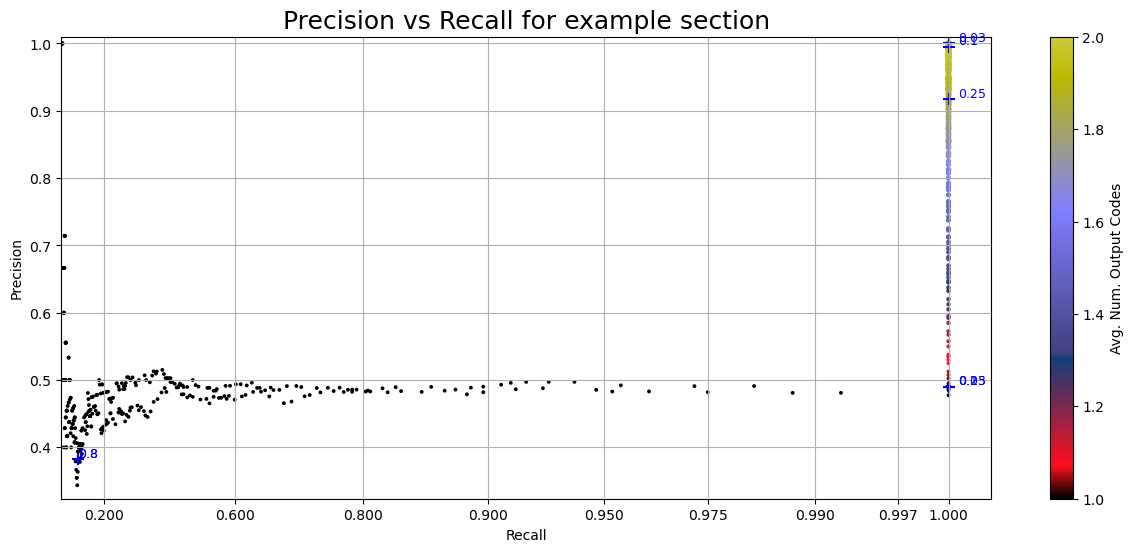

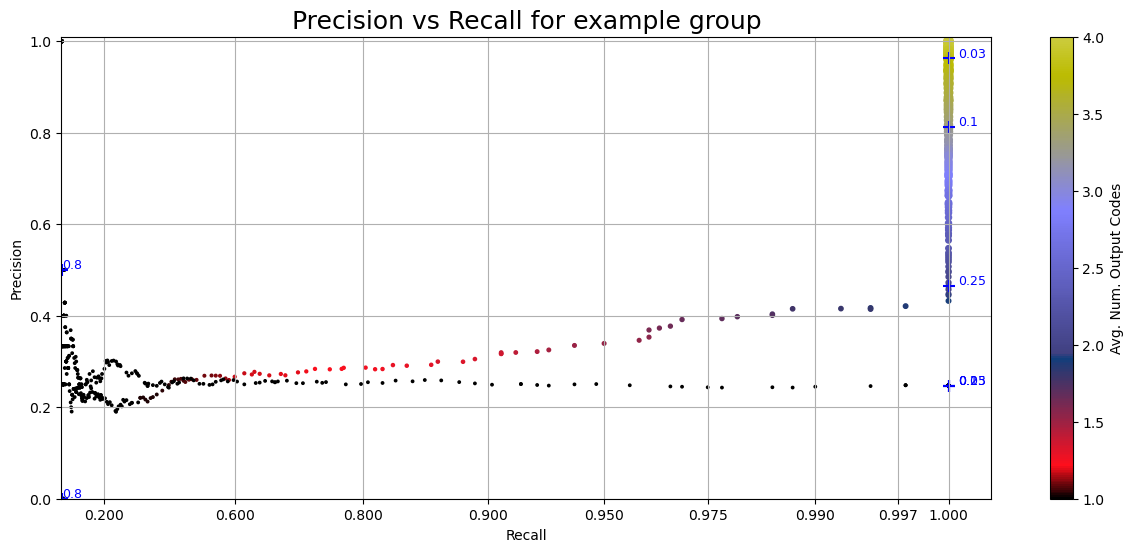

{'section': {'accuracy': 0.4975,
  'f1_score': {'micro': 0.4975,
   'macro': 0.49724548052451556,
   'weighted': 0.4972454805245155}},
 'group': {'accuracy': 0.26,
  'f1_score': {'micro': 0.26,
   'macro': 0.21747403437085566,
   'weighted': 0.3030003501603293}}}

In [18]:
# evaluate a model
codifier_example.evaluate(version='example')

In [19]:
# Predict
help(codifier_example.predict)

Help on method predict in module codauto.codifier:

predict(desc_l, mode, hierarchical_level, threshold, original_code_l=None, identifier_l=None) method of __main__.CodifierRandom instance
    Predict hierarchical classification codes for a list of descriptions.

    Parameters
    ----------
    desc_l : list of str
        List of textual descriptions to classify.
    mode : str
        Mode of prediction:
        - "codification": returns the top 1 predicted class.
        - "assistance": returns the top 15 predicted classes.
    hierarchical_level : int
        Target hierarchical level for which the predictions are returned.
    threshold : float
        Minimum confidence value (0-1) to include a predicted label.
    original_code_l : list, optional
        Original codes for direct recoding. If provided, predictions may be overridden
        by direct correspondences for codes that map unambiguously.
    identifier_l : list, optional
        Unique identifiers corresponding to e

In [20]:
# Predictions can be made on a specific level
desc_l=['prueba']*5
mode = 'codification'
hierarchical_level = 2
threshold = 0

codifier_example.predict(
    desc_l,
    mode,
    hierarchical_level,
    threshold
)

[{'description': 'prueba',
  'original_code': None,
  'label': ('A2',),
  'confidence': (55,),
  'hierarchical_level': 2,
  'identifier': 0,
  'title': ('Grupo A2',)},
 {'description': 'prueba',
  'original_code': None,
  'label': ('B2',),
  'confidence': (53,),
  'hierarchical_level': 2,
  'identifier': 1,
  'title': ('Grupo B2',)},
 {'description': 'prueba',
  'original_code': None,
  'label': ('B2',),
  'confidence': (34,),
  'hierarchical_level': 2,
  'identifier': 2,
  'title': ('Grupo B2',)},
 {'description': 'prueba',
  'original_code': None,
  'label': ('B1',),
  'confidence': (32,),
  'hierarchical_level': 2,
  'identifier': 3,
  'title': ('Grupo B1',)},
 {'description': 'prueba',
  'original_code': None,
  'label': ('B2',),
  'confidence': (33,),
  'hierarchical_level': 2,
  'identifier': 4,
  'title': ('Grupo B2',)}]

In [21]:
# Assistance can also be requested
desc_l=['prueba']*5
mode = 'assistance'
hierarchical_level = 1
threshold = 0

codifier_example.predict(
    desc_l,
    mode,
    hierarchical_level,
    threshold
)

[{'description': 'prueba',
  'original_code': None,
  'label': ('A', 'B'),
  'confidence': (64, 36),
  'hierarchical_level': 1,
  'identifier': 0,
  'title': ('Sección A', 'Sección B')},
 {'description': 'prueba',
  'original_code': None,
  'label': ('A', 'B'),
  'confidence': (54, 46),
  'hierarchical_level': 1,
  'identifier': 1,
  'title': ('Sección A', 'Sección B')},
 {'description': 'prueba',
  'original_code': None,
  'label': ('B', 'A'),
  'confidence': (65, 35),
  'hierarchical_level': 1,
  'identifier': 2,
  'title': ('Sección B', 'Sección A')},
 {'description': 'prueba',
  'original_code': None,
  'label': ('A', 'B'),
  'confidence': (57, 43),
  'hierarchical_level': 1,
  'identifier': 3,
  'title': ('Sección A', 'Sección B')},
 {'description': 'prueba',
  'original_code': None,
  'label': ('A', 'B'),
  'confidence': (63, 37),
  'hierarchical_level': 1,
  'identifier': 4,
  'title': ('Sección A', 'Sección B')}]

### CodifierFastText
La librería codauto ya dispone de una clase hija implementada que permite entrenar de manera supervisada modelos con la librería fasttext que clasifica con una estratégia bottom-up. Se puede usar el comando help para acceder a la documentación y empezar a entrenar directamente. Desde el INE ya se tiene en producción dos modelos, uno para la CNAE-2009 y otro para la CNAE-2025, generados con esta clase. A continuación se pone un ejemplo de uso para la CNAE25. 

------------------------------------------------------------------------------------------------------------------------------------------------------
### CodifierFastText
The codauto library already provides an implemented child class that allows supervised training of models with the fastText library that classify using a bottom-up strategy. The help command can be used to access the documentation and start training directly. At INE, two models are already in production, one for CNAE-2009 and another for CNAE-2025, both generated with this class. Below is an example of usage for CNAE-2025.

In [22]:
root_path = r'C:\Users\U000000\Desktop\root_codia\pruebas'
structure_25_name = r'CNAE\input\Estructura_CNAE2025.xlsx'
train_name = r'CNAE\input\train_prod_25.csv'
test_name = r'CNAE\input\train_set_25.xlsx'
correspondences_09_25_name = r'CNAE\input\Correspondencia_CNAE09_CNAE25_final.xlsx'

structure_df = pd.read_excel(
    os.path.join(root_path, structure_25_name),
    dtype = 'str'
)
train_df = pd.read_csv(
    os.path.join(root_path, train_name),
    dtype = 'str',
    usecols=[1,2]
)
test_df = pd.read_excel(
    os.path.join(root_path, test_name),
    dtype = 'str'
)
corres_df = pd.read_excel(
    os.path.join(root_path, correspondences_09_25_name),
    dtype = 'str'
)

In [23]:
cnae_structure = StructuredCNAE(
    structure_df,
    ['section', 'division', 'group', 'class']
)

cnae_codifier = CodifierFastText(
    root_path=root_path,
    structure_instance=cnae_structure,
    train_df=train_df,
    test_df=test_df,
    corres_df=corres_df
)

2025-09-04 09:31:24,971 - INFO - Loading train_df..
2025-09-04 09:31:25,040 - INFO - train_df raw data count: 3322658
2025-09-04 09:31:34,742 - INFO - train_df bad codes count: 50405
2025-09-04 09:31:34,743 - INFO - train_df bad descriptions count: 118
2025-09-04 09:31:35,128 - INFO - train_df pruned data count: 3272160
2025-09-04 09:31:35,223 - INFO - Loading test_df..
2025-09-04 09:31:35,224 - INFO - test_df raw data count: 17378
2025-09-04 09:31:35,282 - INFO - test_df bad codes count: 0
2025-09-04 09:31:35,283 - INFO - test_df bad descriptions count: 2
2025-09-04 09:31:35,286 - INFO - test_df pruned data count: 17376


In [24]:
help(cnae_codifier.train) # documentacion for train

Help on method train in module codauto.codifier_fasttext:

train(**kwargs) method of codauto.codifier_fasttext.CodifierFastText instance
    Train a FastText supervised model on the provided dataset.

    This method prepares the training data in FastText format, optionally uses
    pre-trained word vectors, and trains a supervised model. Training duration
    is logged.

    Parameters
    ----------
    **kwargs : dict
        Optional keyword arguments:
        - epoch : int, default=10
            Number of training epochs.
        - lr : float, default=0.1
            Learning rate for training.
        - wordNgrams : int, default=3
            Maximum length of word n-grams.
        - pretrained_vectors : str or None, default=None
            Filename of pre-trained word vectors to use.
        - train_set : pandas.DataFrame, default=self.train_df
            Training dataset with labels in the first column and text in the second.

    Notes
    -----
    - The training data is t

In [25]:
# Load a previously trained model from the path
cnae_codifier.load(
    name=r'CNAE\prod_model\cod_cnae_25.bin'
) 

In [26]:
# Example of how including the original code influences the results
desc_l=[
    'venta al por menor',
    'venta al por menor'
       ]
orig_code_l = [
    None,
    '4711'
]
mode = 'assistance'
hierarchical_level = 4
threshold = 0.03

cnae_codifier.predict(
    desc_l=desc_l,
    mode=mode,
    hierarchical_level=hierarchical_level,
    threshold=threshold,
    original_code_l=orig_code_l,
)

[{'description': 'venta al por menor',
  'original_code': None,
  'label': ('4712',
   '4771',
   '9013',
   '1421',
   '6820',
   '4779',
   '4711',
   '4791',
   '4763'),
  'confidence': (25, 9, 7, 6, 5, 4, 4, 3, 3),
  'hierarchical_level': 4,
  'identifier': 0,
  'title': ('Otro comercio al por menor no especializado',
   'Comercio al por menor de prendas de vestir',
   'Otras actividades de creación artística',
   'Confección de prendas de vestir exteriores',
   'Alquiler de bienes inmobiliarios por cuenta propia',
   'Comercio al por menor de artículos de segunda mano',
   'Comercio al por menor no especializado con predominio de productos alimenticios, bebidas y tabaco',
   'Actividades de servicios de intermediación para el comercio al por menor no especializado',
   'Comercio al por menor de artículos deportivos')},
 {'description': 'venta al por menor',
  'original_code': '4711',
  'label': ('4711', '4791'),
  'confidence': (53, 47),
  'hierarchical_level': 4,
  'identifier': 

In [27]:
# Finally, the versatility of the library is demonstrated, showing how the CodifierRandom class can be used with CNAE
cnae_codifier = CodifierRandom(
    root_path=root_path,
    structure_instance=cnae_structure,
    train_df=train_df,
    test_df=test_df,
    corres_df=corres_df
)

2025-09-04 09:31:38,974 - INFO - Loading train_df..
2025-09-04 09:31:39,041 - INFO - train_df raw data count: 3322658
2025-09-04 09:31:48,096 - INFO - train_df bad codes count: 50405
2025-09-04 09:31:48,097 - INFO - train_df bad descriptions count: 118
2025-09-04 09:31:48,487 - INFO - train_df pruned data count: 3272160
2025-09-04 09:31:48,579 - INFO - Loading test_df..
2025-09-04 09:31:48,580 - INFO - test_df raw data count: 17378
2025-09-04 09:31:48,640 - INFO - test_df bad codes count: 0
2025-09-04 09:31:48,641 - INFO - test_df bad descriptions count: 2
2025-09-04 09:31:48,644 - INFO - test_df pruned data count: 17376


2025-09-04 09:31:48,963 - INFO - Test set size 17376 for source all
Predicting test_set for 15 classes: 100%|███████████████████████████████████████| 17376/17376 [00:42<00:00, 408.37it/s]
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\U000000\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axi

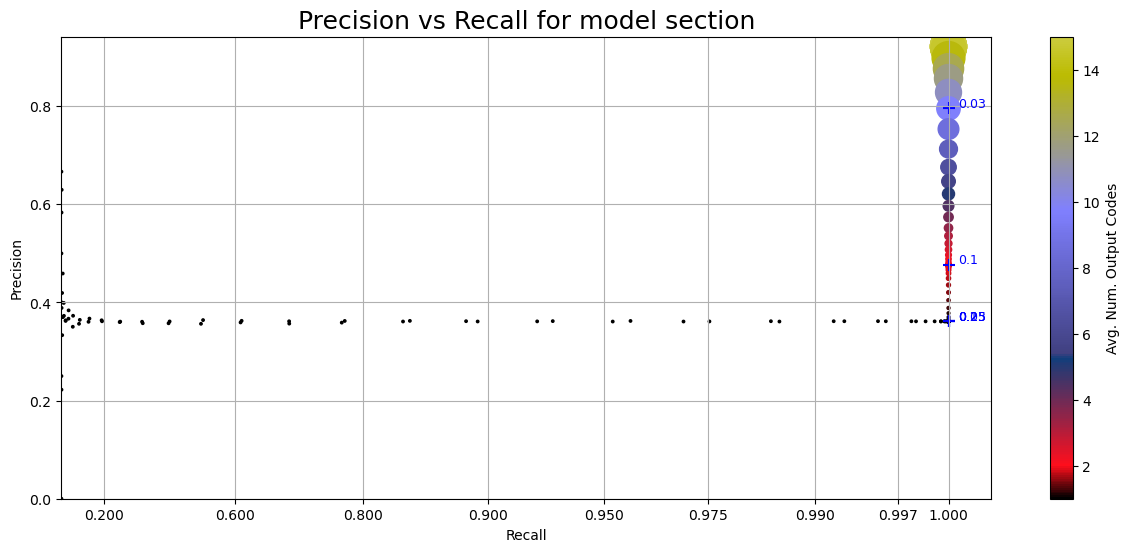

2025-09-04 09:50:47,536 - INFO - Threshold 0.8 not found for level division in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,537 - INFO - Threshold 0.25 not found for level division in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,538 - INFO - Threshold 0.1 not found for level division in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,542 - INFO - Threshold 0.8 not found for level division in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,543 - INFO - Threshold 0.25 not found for level division in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,543 - INFO - Threshold 0.1 not found for level division in precision_vs_recall_multi_conf_1.


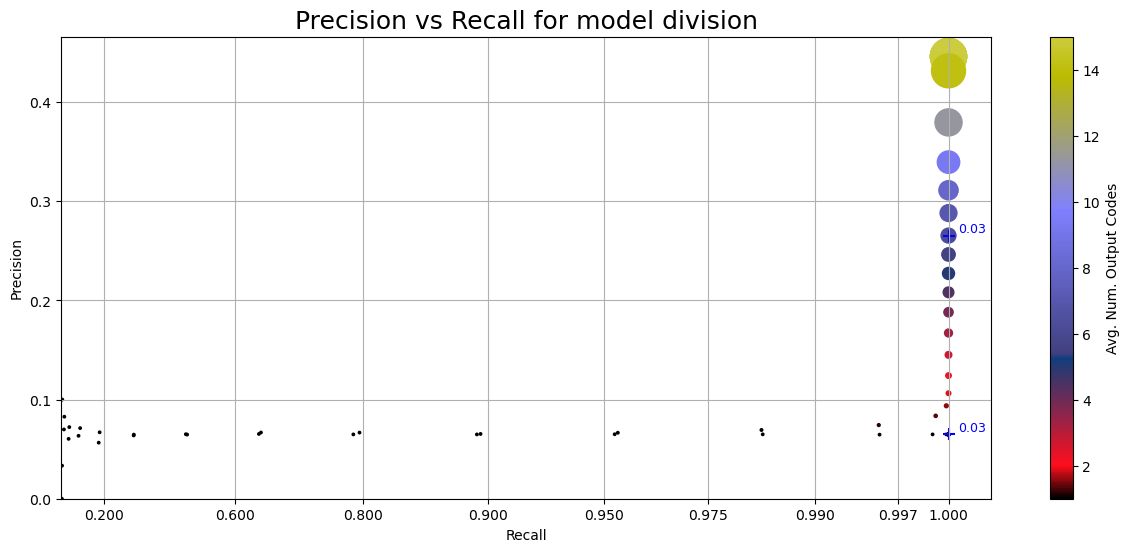

2025-09-04 09:50:47,702 - INFO - Threshold 0.8 not found for level group in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,702 - INFO - Threshold 0.25 not found for level group in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,703 - INFO - Threshold 0.1 not found for level group in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,704 - INFO - Threshold 0.03 not found for level group in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,706 - INFO - Threshold 0.8 not found for level group in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,706 - INFO - Threshold 0.25 not found for level group in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,707 - INFO - Threshold 0.1 not found for level group in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,707 - INFO - Threshold 0.03 not found for level group in precision_vs_recall_multi_conf_1.


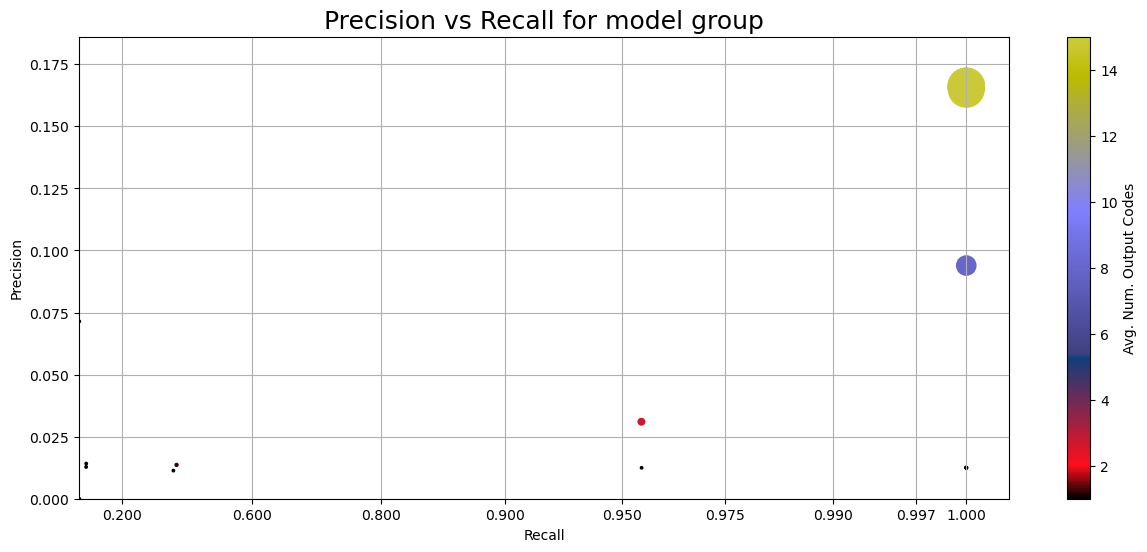

2025-09-04 09:50:47,867 - INFO - Threshold 0.8 not found for level class in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,868 - INFO - Threshold 0.25 not found for level class in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,868 - INFO - Threshold 0.1 not found for level class in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,868 - INFO - Threshold 0.03 not found for level class in precision_vs_recall_multi_conf_15.
2025-09-04 09:50:47,872 - INFO - Threshold 0.8 not found for level class in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,872 - INFO - Threshold 0.25 not found for level class in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,873 - INFO - Threshold 0.1 not found for level class in precision_vs_recall_multi_conf_1.
2025-09-04 09:50:47,873 - INFO - Threshold 0.03 not found for level class in precision_vs_recall_multi_conf_1.


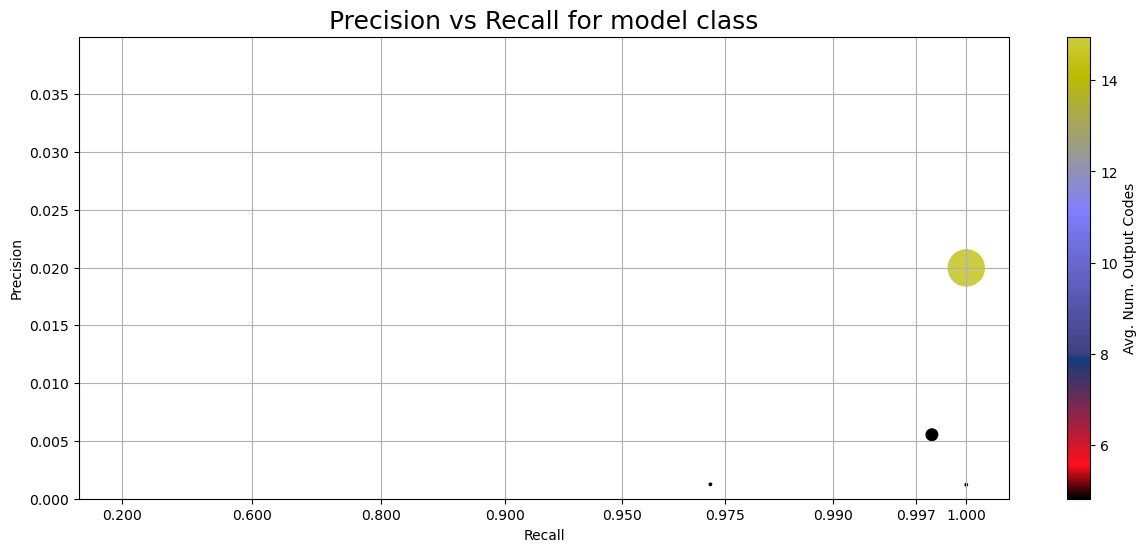

{'section': {'accuracy': 0.3614180478821363,
  'f1_score': {'micro': 0.3614180478821363,
   'macro': 0.024133796538260522,
   'weighted': 0.19189257192254108}},
 'division': {'accuracy': 0.06497467771639043,
  'f1_score': {'micro': 0.06497467771639043,
   'macro': 0.0015886733101561836,
   'weighted': 0.008724582853234054}},
 'group': {'accuracy': 0.010359116022099447,
  'f1_score': {'micro': 0.010359116022099447,
   'macro': 0.0007759216067464609,
   'weighted': 0.00266896044196374}},
 'class': {'accuracy': 0.0011510128913443832,
  'f1_score': {'micro': 0.0011510128913443832,
   'macro': 0.00043467367398472426,
   'weighted': 0.00045773499983214037}}}

In [28]:
cnae_codifier.evaluate()